# GRIP@ The Sparks Foundation

#  Name : Rumana Afsar Patel

# Task1: Prediction using Supervised ML.

# Predict the percentage of an student based on the number of study hours.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


# Loading Data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully.")
data.head()

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isna().sum() #checking for null or na (data.isnull()) values

Hours     0
Scores    0
dtype: int64

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualization

<AxesSubplot:>

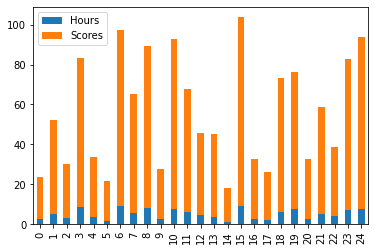

In [6]:
data.plot.bar(stacked = True)

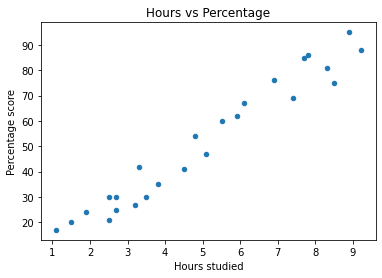

In [7]:
#Scatter plot
data.plot.scatter(x='Hours',y='Scores')
plt.title('Hours vs Percentage')
plt.xlabel('Hours studied')
plt.ylabel('Percentage score')
plt.show()

<Figure size 864x504 with 0 Axes>

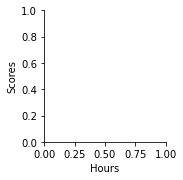

In [8]:
plt.figure(figsize=(12,7))
sns.pairplot(data, x_vars='Hours', y_vars='Scores')
plt.show()

In [11]:
#some important libraries
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.metrics as sm 

# Preparing the Data

Here we divide the data into features and target variables

In [12]:
x=data.iloc[:,0].values
y=data.iloc[:,1].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

# Splitting the Data

In [13]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, train_size = 0.8)

In [14]:
print(X_train.shape)
print(y_train.shape)

(20, 1)
(20, 1)


In [15]:
print(X_test.shape)
print(y_test.shape)

(5, 1)
(5, 1)


# Training of Model

We use Linear regression model

In [16]:
from sklearn.linear_model import LinearRegression
#creating an object of Linear Regression
lm = LinearRegression()
#model fitting
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
#Intercept value
print("Intercept : ",lm.intercept_)
#Slope value
print("Slope : ",lm.coef_)

Intercept :  [3.29408196]
Slope :  [[9.60231868]]


# Regression Line

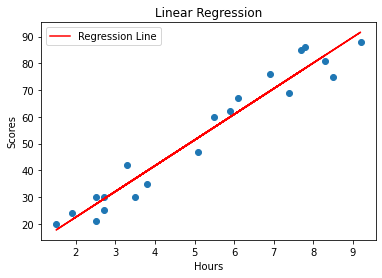

In [18]:
#Visualizing the regression line
plt.scatter(X_train,y_train)
plt.plot(X_train, lm.intercept_+(lm.coef_*X_train), 'r', label = 'Regression Line')
plt.legend()
plt.title('Linear Regression')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

Here thwe relationship between two variables is positive linear. That is, as the number of study hours increases the score also increases.

# Predictions

In [19]:
#Making predictions of y_value
y_train_pred = lm.predict(X_train)
y_pred = lm.predict(X_test)

In [20]:
#Importing r2_square
from sklearn.metrics import r2_score
#comparing the r2 value of both train and test data
print("R^2 train_data :", r2_score(y_train,y_train_pred))
print("R^2 test_data :",r2_score(y_test,y_pred))

R^2 train_data : 0.949917370099684
R^2 test_data : 0.9593955328289278


In [21]:
#comparing actual and predicted values
d1 = pd.DataFrame(y_test)
d2 = pd.DataFrame(y_pred)
d = pd.concat([d1,d2],axis=1)
d.columns=['Actual','Predicted']
d

,Actual,Predicted
0,27,34.021502
1,54,49.385212
2,41,46.504516
3,17,13.856633
4,95,88.754718


# What will be the predicted score if a student studies for 9.25 hrs/day?

In [22]:
pred = lm.predict([[9.25]])
pred

array([[92.11552979]])

If a student studies for 9.25 hrs/day, then the predicted score will be 92.1155.

# Accuracy of Model

In [23]:
print("Mean absolute error :",metrics.mean_absolute_error(y_test, y_pred))
print("Mean squared error :",metrics.mean_squared_error(y_test, y_pred))
print("R^2ed :",metrics.r2_score(y_test,y_pred))

Mean absolute error : 5.305891075761661
Mean squared error : 29.956351700130266
R^2ed : 0.9593955328289278


R-squared reveals 95.9% of the data fit the regression model.

# Thank you so much !